# Correlation

Correlation is a way to determine if two variables in a dataset are related in any way. A positive correlation indicates that the values tend to increase with one another and a negative correlation indicates that values in one set tend to decrease with an increase in the other set.

When building machine learning models correlations are an important factor in determining features. Not only can this help us to see which features are linear related, but if features are strongly correlated we can remove them to prevent duplicating information.

In data science we can use the **r value**, also called `Pearson’s correlation coefficient`. This measures how closely two sequences of numbers( i.e., columns, lists, series, etc.) are correlated.

The **r value** is a number between -1 and 1. It tells us whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1, the stronger the positive correlation. The closer to -1, the stronger the negative correlation (i.e., the more “opposite” the columns are). The closer to 0, the weaker the correlation.

The rvalue formula is:



































![PearsonCorrelationCoefficient1.png](attachment:PearsonCorrelationCoefficient1.png)

In [ ]:
import io

# importing pandas as pd
import pandas as pd
from google.colab import files
uploaded = files.upload()

# Making data frame from the csv file
# df = pd.read_csv("PracticeData3.csv")
# df = pd.read_csv("CaliforniaHousingWHeader.csv")
df = pd.read_csv(io.BytesIO(uploaded['CaliforniaHousingWHeader.csv']))
# Printing the first 10 rows of the data frame for visualization
df[:10]

Saving CaliforniaHousingWHeader.csv to CaliforniaHousingWHeader.csv


,longtitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41,880,129,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200
5,-122.25,37.85,52,919,213,413,193,4.0368,269700
6,-122.25,37.84,52,2535,489,1094,514,3.6591,299200
7,-122.25,37.84,52,3104,687,1157,647,3.1200,241400
8,-122.26,37.84,42,2555,665,1206,595,2.0804,226700
9,-122.25,37.84,52,3549,707,1551,714,3.6912,261100


https://developers.google.com/machine-learning/crash-course/california-housing-data-description

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz

## Using the corr() method

Using the Pandas correlation method we can see correlations for all numerical columns in the DataFrame. Since this is a method, all we have to do is call it on the DataFrame. The return value will be a new DataFrame showing each correlation.

In [2]:
# To find the correlation among
# the columns using pearson method
df.corr(method ='pearson')

,longtitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
longtitude,1.000000,-0.924664,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,-0.079809,-0.144160
housingMedianAge,-0.108197,0.011173,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,-0.119034,0.105623
totalRooms,0.044568,-0.036100,-0.361262,1.000000,0.929893,0.857126,0.918484,0.198050,0.134153
totalBedrooms,0.068378,-0.066318,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.008093,0.050594
population,0.099773,-0.108785,-0.296244,0.857126,0.878026,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979829,0.907222,1.000000,0.013033,0.065843
medianIncome,-0.015176,-0.079809,-0.119034,0.198050,-0.008093,0.004834,0.013033,1.000000,0.688075
medianHouseValue,-0.045967,-0.144160,0.105623,0.134153,0.050594,-0.024650,0.065843,0.688075,1.000000


The Result of the `corr()` method is a table with a lot of numbers that represents how well the relationship is between two columns.

The number varies from -1 to 1.

1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

0.9 is also a good relationship, and if you increase one value, the other will probably increase as well. For example, the correlation between the features totalBedrooms and households is 0.979892. These two features are indeed highly correlated. When a household is big, obviously the total bedrooms is higher and vice versa.

-0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down. From the correlation table above, it is obvious the features longtitude and latitude have a very strong opposite relationship. Longtitude - a measure of how far west a house is; a more negative value is farther west. Latitude - a measure of how far north a house is; a higher value is farther north. As either one of the values becomes more negative, the further apart the two distances.

0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will. The two features with this range of correlation are medianIncomde and households, with 0.013033. Without the correlation function, one might think these two features are somewhat closely related. But come to think of it, when a median income increase, it is indeed not necessarily the hoursehold increases.

In [3]:
# correlation between totalBedrooms and households
print(df['totalBedrooms'].corr(df['households']))

0.9798289611319984


The corr() method has a parameter that allows you to choose which method to find the correlation coefficient. The Pearson method is the default, but you can also choose the Kendall or Spearman method.

In [4]:
# To find the correlation among
# the columns using kendall method
df.corr(method ='kendall')

,longtitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
longtitude,1.000000,-0.692317,-0.104427,0.027314,0.042542,0.082974,0.040693,-0.006248,-0.052495
latitude,-0.692317,1.000000,0.026044,-0.012295,-0.037382,-0.082507,-0.049643,-0.059947,-0.109411
housingMedianAge,-0.104427,0.026044,1.000000,-0.247385,-0.212223,-0.197112,-0.194582,-0.099609,0.049822
totalRooms,0.027314,-0.012295,-0.247385,1.000000,0.755625,0.642796,0.748841,0.183459,0.137863
totalBedrooms,0.042542,-0.037382,-0.212223,0.755625,1.000000,0.702957,0.905501,-0.003393,0.058364
population,0.082974,-0.082507,-0.197112,0.642796,0.702957,1.000000,0.743150,0.003885,0.002172
households,0.040693,-0.049643,-0.194582,0.748841,0.905501,0.743150,1.000000,0.020186,0.075264
medianIncome,-0.006248,-0.059947,-0.099609,0.183459,-0.003393,0.003885,0.020186,1.000000,0.495528
medianHouseValue,-0.052495,-0.109411,0.049822,0.137863,0.058364,0.002172,0.075264,0.495528,1.000000


In [5]:
# To find the correlation among
# the columns using kendall method
df.corr(method ='spearman')

,longtitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
longtitude,1.000000,-0.879203,-0.150752,0.040120,0.063028,0.123527,0.060020,-0.009928,-0.069667
latitude,-0.879203,1.000000,0.032440,-0.018435,-0.055985,-0.123626,-0.074299,-0.088029,-0.165739
housingMedianAge,-0.150752,0.032440,1.000000,-0.357162,-0.307539,-0.283879,-0.281989,-0.147308,0.074855
totalRooms,0.040120,-0.018435,-0.357162,1.000000,0.915245,0.816185,0.906734,0.271321,0.205952
totalBedrooms,0.063028,-0.055985,-0.307539,0.915245,1.000000,0.871374,0.975754,-0.005068,0.087408
population,0.123527,-0.123626,-0.283879,0.816185,0.871374,1.000000,0.903872,0.006268,0.003839
households,0.060020,-0.074299,-0.281989,0.906734,0.975754,0.903872,1.000000,0.030305,0.112737
medianIncome,-0.009928,-0.088029,-0.147308,0.271321,-0.005068,0.006268,0.030305,1.000000,0.676778
medianHouseValue,-0.069667,-0.165739,0.074855,0.205952,0.087408,0.003839,0.112737,0.676778,1.000000


In [6]:
# To find the correlation among
# the columns using pearson method
df.corr(method ='pearson')

,longtitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
longtitude,1.000000,-0.924664,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,-0.079809,-0.144160
housingMedianAge,-0.108197,0.011173,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,-0.119034,0.105623
totalRooms,0.044568,-0.036100,-0.361262,1.000000,0.929893,0.857126,0.918484,0.198050,0.134153
totalBedrooms,0.068378,-0.066318,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.008093,0.050594
population,0.099773,-0.108785,-0.296244,0.857126,0.878026,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979829,0.907222,1.000000,0.013033,0.065843
medianIncome,-0.015176,-0.079809,-0.119034,0.198050,-0.008093,0.004834,0.013033,1.000000,0.688075
medianHouseValue,-0.045967,-0.144160,0.105623,0.134153,0.050594,-0.024650,0.065843,0.688075,1.000000


In [7]:
# df.style.background_gradient(cmap='coolwarm')

### Heatmap

Python, and its libraries, make lots of things easy. For example, once the correlation matrix is defined, it can be passed to Seaborn’s `heatmap()` method to create a heatmap (or headgrid). The basic idea of heatmaps is that they replace numbers with colors of varying shades, as indicated by the scale on the right. Cells that are lighter have higher values of **r**.

<Axes: >

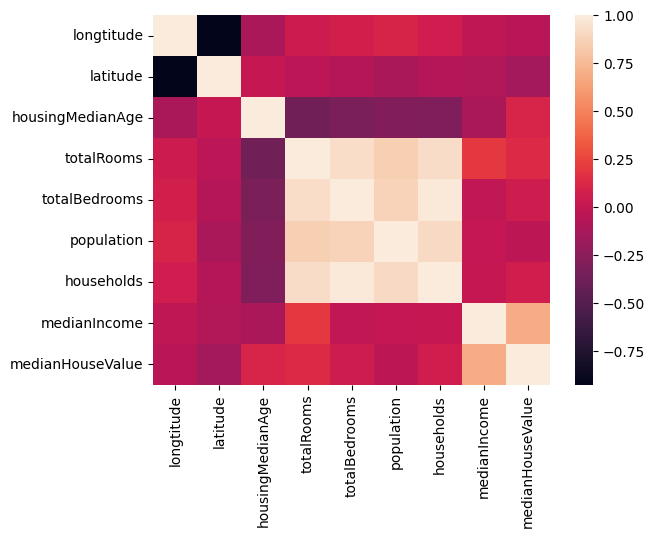

In [8]:
# Plotting the correlation matrix using heatmap
import seaborn as sns

sns.heatmap(df.corr())

This type of visualization (heatmap) can make it much easier to spot linear relationships between variables than a table of numbers. For example, if I focus on the "totalBedrooms" column, I immediately see that "totalRooms", "population", and "households" have the largest positive correlations whereas "housingMedianAge" has the large negative correlation.

### Scatter plot

Scatterplots are a fundamental graph type; much less complicated than histograms and boxplots. As such, we might use the Mathplotlib library instead of the Seaborn library. But since we have already used Seaborn, I will stick with it here. Just know that there are many ways to create scatterplots and other basic graphs in Python.

To create a bare-bones scatterplot, we must do four things:

* Load the seaborn library

* Specify the source data frame

* Set the x axis, which is generally the name of a predictor/independent variable

* Set the y axis, which is generally the name of a response/dependent variable

Text(0, 0.5, 'Population')

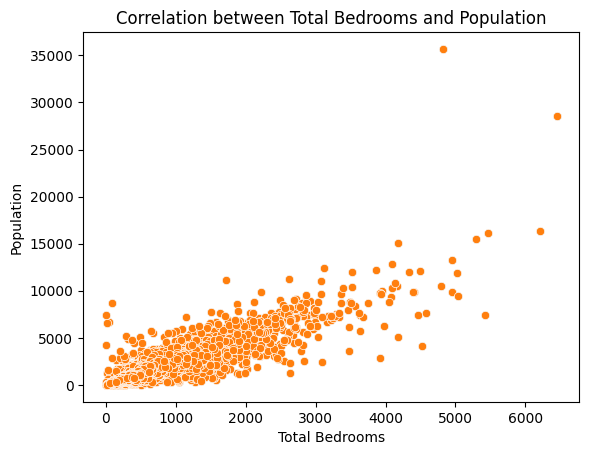

In [9]:
sns.scatterplot(x="totalBedrooms", y="population", data=df);
ax = sns.scatterplot(x="totalBedrooms", y="population", data=df)
ax.set_title("Correlation between Total Bedrooms and Population")
ax.set_xlabel("Total Bedrooms");
ax.set_ylabel("Population")

Sometimes it is useful to add a best fit line (with confidence intervals around the slope) to a scatterplot to help visualize the linearlity of the relationship. One way to “add” a best-fit line to a scatterplot is to use a different plotting method. Seaborn’s `lmplot()` method (where “lm” stands for “linear model”) is one possibility.

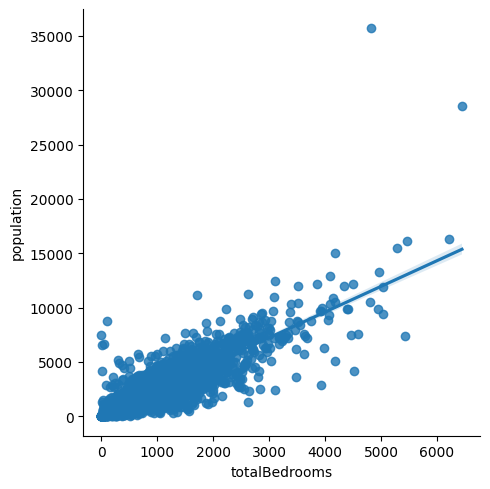

In [10]:
# Adding best fit line using lmplot() method.
sns.lmplot(x="totalBedrooms", y="population", data=df);

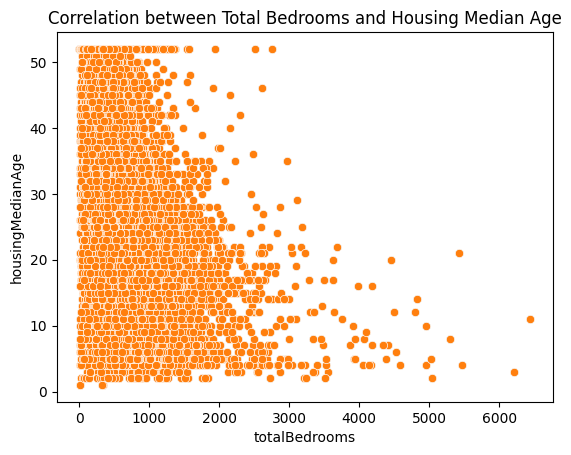

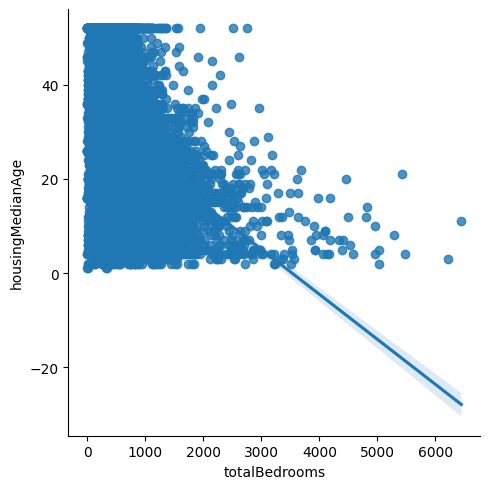

In [11]:
# Scatter plot showing a negative correlated features
sns.scatterplot(x="totalBedrooms", y="housingMedianAge", data=df);
ax = sns.scatterplot(x="totalBedrooms", y="housingMedianAge", data=df)
ax.set_title("Correlation between Total Bedrooms and Housing Median Age")
sns.lmplot(x="totalBedrooms", y="housingMedianAge", data=df);

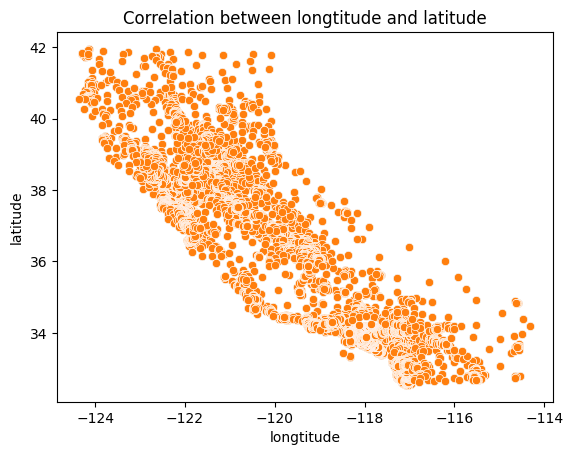

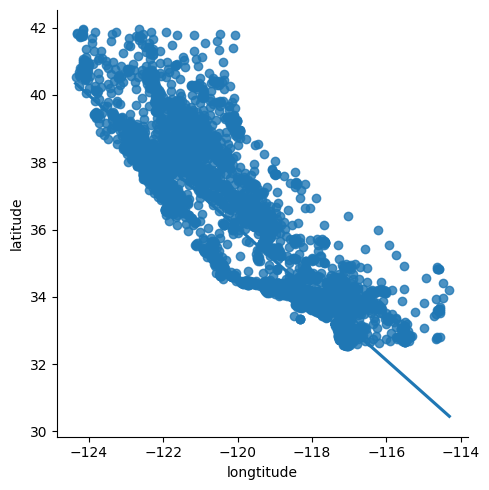

In [12]:
# An example of higher negative correlated features
sns.scatterplot(x="longtitude", y="latitude", data=df);
ax = sns.scatterplot(x="longtitude", y="latitude", data=df)
ax.set_title("Correlation between longtitude and latitude")
sns.lmplot(x="longtitude", y="latitude", data=df);

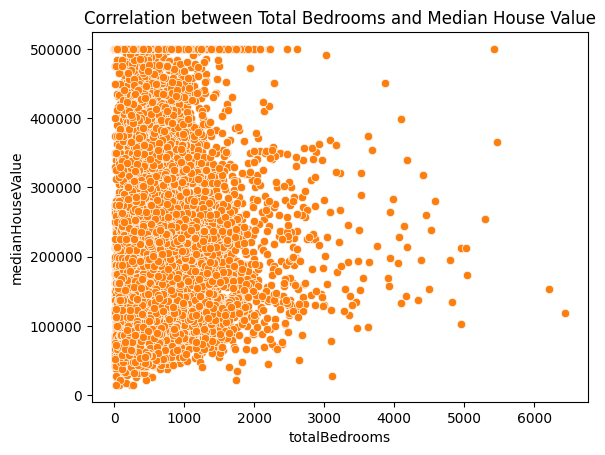

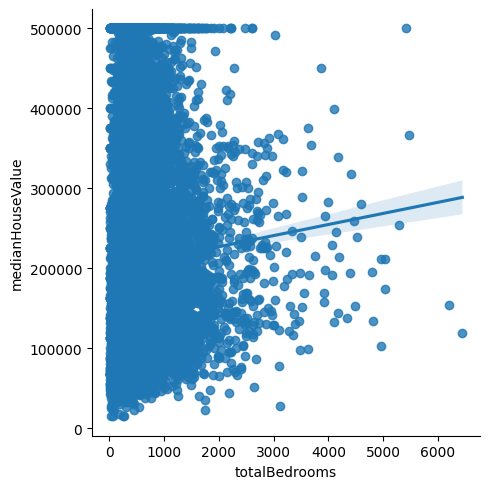

In [13]:
# Scatter plot showing a weakly correlated features
sns.scatterplot(x="totalBedrooms", y="medianHouseValue", data=df);
ax = sns.scatterplot(x="totalBedrooms", y="medianHouseValue", data=df)
ax.set_title("Correlation between Total Bedrooms and Median House Value")
sns.lmplot(x="totalBedrooms", y="medianHouseValue", data=df);